# Music Genre Classification

## Introduction

In this project I investigate a suitable model for the classification of music samples by genre. Music Genre Classification is a part of Music Information Retrieval tand it has been developing, particularly since the work of Tzanetakis and Cook (2002). It has grown in importance with the proliferation of music streaming platforms such as Spotify, Pandora, and others, which makes increasing use of data science and machine learning technologies to recommend listening to subscribers to these platforms. 

#### Dataset:

The dataset used for this exploratory study id the GZTAN dataset that was obtained from the kaggle.com website. The features contained in the dataset are audio characteristics which were extracted for each of the of the musical example in the dataset. These features include the mean and variance of: chroma stft, rms, spectal centroid, bandwidth, rolloff, zero crossing rate, harmony, tempo, and mfccs. 

Mel-frequency cepstral coefficients (mfccs) is a popular timbral feature used in music genre classification that approximates the way frequencies are mapped to the nerves of the inner ear in humans.(Ramirez and Flores, 2019; Logan, 2000). Spectral centroid is linked to the 'brightness' of sound, rolloff is metric for the spectral shape, and the zero crossing rate is related to the noise component of an audio signal. (Ramirez and Flores, 2019; Tzanetakis and Cook, 2002). Pitch and its related musical elements, melody and harmony, is represented by chroma features. (Muller, 2015)

There is also  a feature - 'label' - that identifies each example as a specific genre of music ('blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'). This feature serves as the target variable while the aforementioned features constitute the input variables. 

#### Findings:

The scores for the average accuracy of each model in correctly identifying the respective labels/classes in the test set show that: 

 - The MLPClassifier and LinearSVC models performed the best with accuracy score of 70%, while the RandomForestClassifier and KNeighborsClassifier models performed creditably with scores of 67% and 65% respectively. The DecisionTree and GuasianNB classifiers performed poorly.

 - The following shows the precision, recall, and f1 scores, and the confusion matrix from which they can be derived, for the SVC and MLP classifiers.

#### Algorithms used

This study will evaluate five algorithms availabel from the scikit-learn library. This is not a binary classification exercise. Since the target variable 'label' is made up of 10 classes/labels, this is a multi-class and/or multilabel classification process. As such I have chosen to examine that support classification of this nature. The algorithms are: Naive_Bayes.GausianNB, DecisionTrees, RandomForestClassifier, KNeighborsClassifier, MPLClassifier, and LinearSVC. 

#### Author in brief

While I have an interests in machine learning and datascience because I would like to examine modeling for environmental and climate change problem, as well as the alleviation of poverty and hunger; I am also deeply interested in music and decided to initiate my path in machine learning with a music classification project. 

## Library Imports

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score, ConfusionMatrixDisplay, recall_score
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Exploratory Analysis

In [3]:
# load dataset
df = pd.read_csv('features_30_sec.csv')

# display the first five rows
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
# display the last five rows
df.tail()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,1.222421e+06,0.089227,0.001305,1.926835e-06,0.004594,-0.000012,0.000681,103.359375,-153.640961,2540.949463,109.864647,455.579956,-23.065695,189.883865,59.050125,132.334518,-7.475873,92.553497,19.726795,58.462181,-16.484838,89.278427,18.066439,43.789928,-22.202005,77.724525,15.409106,61.443748,-12.372051,42.666080,12.348828,43.414345,-12.297895,49.383522,5.777902,56.457893,-10.273881,36.433578,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,1.046621e+06,0.097664,0.000868,-1.406142e-06,0.003981,-0.000012,0.000818,117.453835,-142.392029,3282.358887,116.189629,345.518890,-32.147167,191.464813,49.117840,66.674255,-8.373376,81.370674,22.882061,44.545662,-18.315985,63.946007,20.098146,43.887966,-22.093319,37.119415,10.798820,53.151684,-12.979385,44.253551,14.080058,38.195637,-16.392994,34.824745,4.154395,29.224157,-4.364872,43.484493,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,8.042154e+05,0.121823,0.001697,-4.881450e-07,0.003825,-0.000014,0.001124,129.199219,-124.952271,1681.638794,115.177155,475.088074,-47.975151,290.302795,52.814674,113.682693,-13.484810,77.294281,21.742352,81.096153,-12.407492,59.990017,20.122042,41.712540,-18.363756,44.554043,10.120382,82.069191,-16.037611,43.337452,10.474113,42.966385,-17.947060,44.368690,1.212127,37.248077,-11.519417,39.505585,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,1.332712e+06,0.048724,0.000808,7.986756e-07,0.006077,-0.000013,0.000653,73.828125,-225.007751,10766.367188,123.646751,492.819122,-9.724174,605.487488,56.605164,189.945770,10.436500,156.834641,20.622280,211.036163,-10.253696,107.069740,15.561657,103.171165,-8.227290,69.988968,12.800152,92.819435,-9.001975,63.858929,7.682845,75.528023,-10.070732,56.776089,-0.256386,42.620800,-5.275370,46.763134,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock
999,rock.00099.wav,661794,0.358401,0.085884,0.054454,0.000336,1609.795082,422203.216152,1797.213044,120115.632927,3246.908930,1.753476e+06,0.076305,0.002171,4.603694e-07,0.002664,-0.000016,0.000191,123.046875,-235.161972,7712.194336,123.870110,798.665283,-22.538395,518.708618,52.939743,228.190399,-1.444669,182.343460,24.641056,126.902298,-7.073817,119.129547,14.880081,93.618126,-12.769979,79.731667,16.712587,76.233124,-2.936967,79.307365,10.076435,45.758392,-15.024692,42.938053,3.116931,67.357964,-7.123283,58.056416,1.794104,59.167755,-7.069775,73.760391,0.028346,76.504326,-2.025783,72.189316,1.155239,49.662510,rock


In [5]:
# the shape of the dataset
df.shape

(1000, 60)

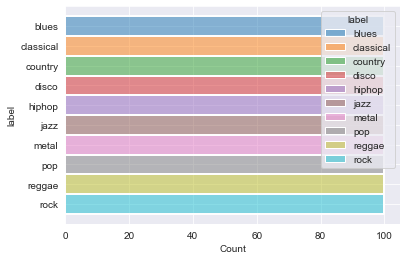

In [6]:
sns.histplot(data=df, y="label", hue='label')
plt.show()

<AxesSubplot:xlabel='count', ylabel='label'>

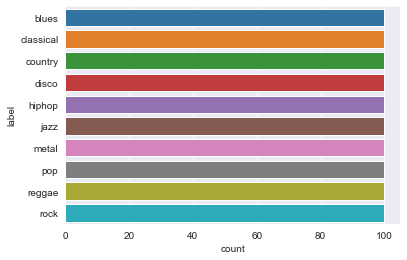

In [7]:
sns.countplot(y='label', data=df)

The above plot show that distribution of labels in the dataset. It indicates that there are equal numbers of the of each label in the datasets; 10 X 999 would equal 9990, the total number of rows in the dataset. 

There are no sparse and mislabeled classes. 

In [8]:
df.label.unique() # unique classes in the target variable

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [9]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

## Data Cleaning

In [10]:
# drop duplicates 
df.drop_duplicates().shape

(1000, 60)

There are no duplicated rows in the the dataset as t shape of remains the same after application of the drop_duplicates method.

The 'filename' and 'length' columns will be removed from the set. 'filename' serves more as an informational guide  and has no bearing as a feature influencing the nature of the sound. 'length' is the same for all the audio clips used to extract the features from examples. It therefore functions as a kind of experimental control ensuring that a common condition of the examples.

In [11]:
df.length.unique()

array([661794, 669680, 661676, 665280, 661760, 663520, 661408, 661344,
       670120, 672282, 663080, 663300, 666820, 668800, 661100, 663740,
       664180, 666160, 668140, 667920, 665060, 661504, 664400, 669240,
       660000, 667700, 675808, 665940, 662112, 672100, 661980, 667480,
       661500, 670340, 669460], dtype=int64)

In [12]:
# Drop 'filename' and 'length'
abt = df.drop(['filename', 'length'], axis=1)
abt.shape

(1000, 58)

## Feature Engineering

The dataset used in this project seems to be adequated engineered for this task of classification. For instance, the mel-frequency ceptrum coefficients (mfccs) have a history of use with speech prior to its use in music (Logan, 2000), and approximates how frequencies are mapped to auditory nerves. Spectral centroid is associated with the 'brightness' of the sound, rolloff with the spectral shape, zero crossings with the noisiness of the audio signal, and chroma with pitch.(Ramirez and Flores, 2019) 

It should be noted that there is a python library 'librosa' that is used to extract these features from audio examples. 

## Algorithm Selection

The algorithms chosen for modeling and testing in this study are RandomForestClassifier, KNeighborsClassifier, DecisionTreeClassifier, LinearSVC, MLPClassifier, and GaussionNB. These algorithms were picked because each (in one way or another) has been associated with research studies in music information retrieval over the last two decades. 

Decision trees has been used in music classification (Basili et al., 2004; Aucouturier et al, 2007). 
ExtraTreesClassifier which "its a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting." (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

Probabilitic modeling to which Naive Bayes(NB) belongs has been used in music analysis and retrieval (Paulus and Klapuri, 2009), music recommendation (Yoshii et al., 2008), music transcription (Benetos and Weyde, 2015), and music emotional perception (Egermann et al., 2013).

Support Vector Machines to which LinearSVC belongs has long been associated with multi-class multilabel classification as they seek to ascertain the "best and widest possible decison boundary between different classes" (Ramirez and Flores, 2019).

Finally, neural networks have been used in many areas of machine learning research, including speech recognition and audio/music studies. Scikit-Learn lists MLPClassifier as it go to neural network classifier and as a result it is used in this study.

## Model Training

In [13]:
# Split the data
X = abt.drop(['label'], axis=1)
y = abt.label

In [14]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#### create pipelines

In [16]:
# Build pipelines
# pipeline dictionary````
pipelines = {
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'kn' : make_pipeline(StandardScaler(),  NeighborhoodComponentsAnalysis(random_state=123), KNeighborsClassifier()),
    'dt' : make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=123)),
    'svc' : make_pipeline(StandardScaler(), LinearSVC(random_state=123, tol=1e-05)),
    'mlp' : make_pipeline(StandardScaler(), MLPClassifier(random_state=123)),
    'nb' : make_pipeline(StandardScaler(), GaussianNB()),
    'et' : make_pipeline(StandardScaler(), ExtraTreesClassifier(random_state=123))
}

#### hyperparameters

In [18]:
# random forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 3, 5, 10]
}

# kneighbors hyperparameters
kn_hyperparameters = {
    'kneighborsclassifier__leaf_size' : [30],
    'kneighborsclassifier__n_neighbors' : [5]
}

# decisiontree hyperparameters
dt_hyperparameters = {
    'decisiontreeclassifier__max_depth' : [1, 3, 5, 7], 
    'decisiontreeclassifier__min_samples_leaf' : [1, 3, 5, 10],
    'decisiontreeclassifier__max_features' : ['auto', 'sqrt', 'log2']
}

# linearSVC hyperparameters
svc_hyperparameters = {
    'linearsvc__C' : [0.01, 0.05, 0.5, 1.0, 1.5, 2.0],
    'linearsvc__max_iter' : [100, 200, 300],
    'linearsvc__tol' : [1e-05]
}

# MLP hyperparameters
mlp_hyperparameters = {
    'mlpclassifier__alpha' : [0.0001, 0.05],
    'mlpclassifier__activation': ['tanh', 'relu'],
    'mlpclassifier__max_iter' : [100, 200, 300]
}

# NB hyperparameters
nb_hyperparameters = {
    
}

# ExtraTrees hyperparameters
et_hyperparameters = {
    'extratreesclassifier__n_estimators' : [100, 200],
    'extratreesclassifier__max_features' : ['auto', 'sqrt', 'log2'],
    'extratreesclassifier__min_samples_leaf' : [1, 3, 5, 10],
    'extratreesclassifier__ccp_alpha' : [0.001, 0.01, 0.1, 0.5]
}

In [22]:
# hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'kn' : kn_hyperparameters,
    'dt' : dt_hyperparameters,
    'svc' : svc_hyperparameters,
    'mlp' : mlp_hyperparameters,
    'nb' : nb_hyperparameters,
    'et' : et_hyperparameters
}

#### fitting models

In [23]:
# fitted models dictionary
fitted_models = {} 

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation  object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models
    fitted_models[name] = model
    
    # print '{name} has been fitted'
    print(name, 'has been fitted.')

rf has been fitted.
kn has been fitted.
dt has been fitted.
svc has been fitted.
mlp has been fitted.
nb has been fitted.
et has been fitted.


## Insights and Anlysis

In [24]:
for name, model in fitted_models.items():
    print(name, model.score(X_test, y_test))

rf 0.665
kn 0.65
dt 0.345
svc 0.7
mlp 0.705
nb 0.48
et 0.675


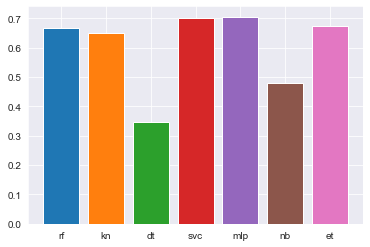

In [25]:
for name, model in fitted_models.items():
    plt.bar(name, model.score(X_test, y_test))

The above scores shows the average accuracy of each model in correctly identifying the respective labels/classes in the test set.

The MLPClassifier and LinearSVC models performed the best with accuracy score of 70%, while the RandomForestClassifier, KNeighborsClassifier, and ExtraTreesClassifier models performed creditably with scores of 67%, 65%, and 68% respectively. The DecisionTree and GuasianNB classifiers performed poorly.

The following shows the precision, recall, and f1 scores, and the confusion matrix from which they can be derived, for the SVC and MLP classifiers.

#### LinearSVC metrics

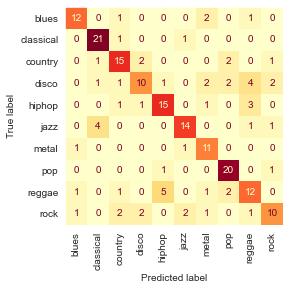

In [26]:
# Predict classes using kneighbors classifier model
pred = fitted_models['svc'].predict(X_test)
# Display the confusion matrix for y_test and pred
cm = confusion_matrix(y_test, pred, labels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'])

cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=fitted_models['svc'].classes_)
cm_disp.plot(include_values=True, colorbar=False, xticks_rotation='vertical', cmap='YlOrRd')
plt.grid(False)
plt.show()


###### A couple other ways to display the confusion matrix

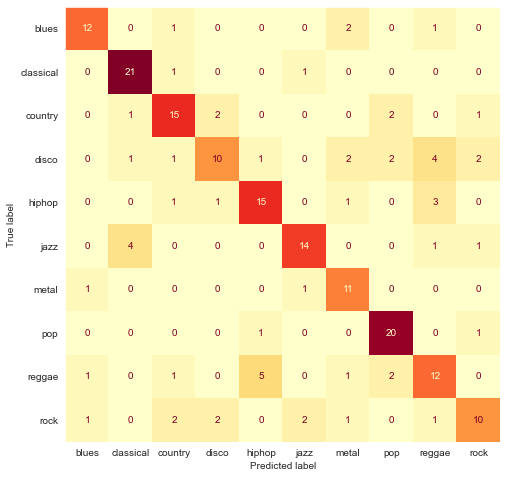

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(fitted_models['svc'], X_test, y_test, ax=ax, cmap='YlOrRd', colorbar=False)
plt.grid(False)
plt.show()

In [28]:
print(cm)

[[12  0  1  0  0  0  2  0  1  0]
 [ 0 21  1  0  0  1  0  0  0  0]
 [ 0  1 15  2  0  0  0  2  0  1]
 [ 0  1  1 10  1  0  2  2  4  2]
 [ 0  0  1  1 15  0  1  0  3  0]
 [ 0  4  0  0  0 14  0  0  1  1]
 [ 1  0  0  0  0  1 11  0  0  0]
 [ 0  0  0  0  1  0  0 20  0  1]
 [ 1  0  1  0  5  0  1  2 12  0]
 [ 1  0  2  2  0  2  1  0  1 10]]


In [29]:
print(f1_score(y_test, pred, labels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], average=None))

[0.77419355 0.84       0.69767442 0.52631579 0.69767442 0.73684211
 0.70967742 0.83333333 0.54545455 0.58823529]


In [30]:
print(accuracy_score(y_test, pred, normalize=True))

0.7


In [31]:
print(precision_score(y_test, pred, labels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], average=None))

[0.8        0.77777778 0.68181818 0.66666667 0.68181818 0.77777778
 0.61111111 0.76923077 0.54545455 0.66666667]


In [32]:
print(recall_score(y_test, pred, labels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], average=None))

[0.75       0.91304348 0.71428571 0.43478261 0.71428571 0.7
 0.84615385 0.90909091 0.54545455 0.52631579]


#### MLPClassifier metrics

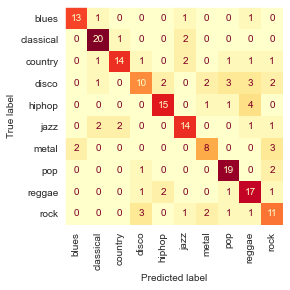

In [33]:
# Predict classes using kneighbors classifier model
predm = fitted_models['mlp'].predict(X_test)

# Display the confusion matrix for y_test and pred
cm2 = confusion_matrix(y_test, predm, labels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'])

cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=fitted_models['mlp'].classes_)
cm_disp.plot(include_values=True, colorbar=False, xticks_rotation='vertical', cmap='YlOrRd')
plt.grid(False)
plt.show()

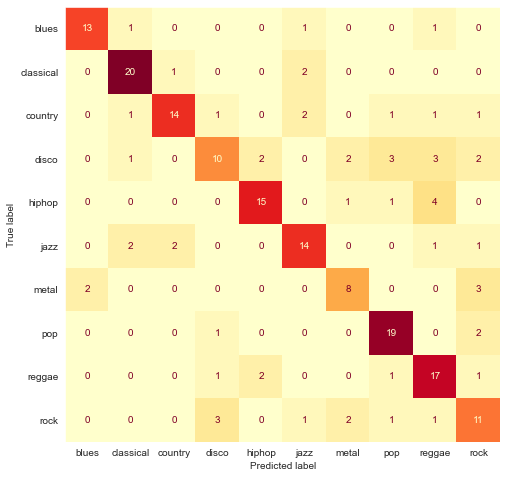

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(fitted_models['mlp'], X_test, y_test, ax=ax, cmap='YlOrRd', colorbar=False)
plt.grid(False)
plt.show()

In [35]:
print(cm2)

[[13  1  0  0  0  1  0  0  1  0]
 [ 0 20  1  0  0  2  0  0  0  0]
 [ 0  1 14  1  0  2  0  1  1  1]
 [ 0  1  0 10  2  0  2  3  3  2]
 [ 0  0  0  0 15  0  1  1  4  0]
 [ 0  2  2  0  0 14  0  0  1  1]
 [ 2  0  0  0  0  0  8  0  0  3]
 [ 0  0  0  1  0  0  0 19  0  2]
 [ 0  0  0  1  2  0  0  1 17  1]
 [ 0  0  0  3  0  1  2  1  1 11]]


In [36]:
print(accuracy_score(y_test, predm, normalize=True))

0.705


In [37]:
print(precision_score(y_test, predm, labels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], average=None))

[0.86666667 0.8        0.82352941 0.625      0.78947368 0.7
 0.61538462 0.73076923 0.60714286 0.52380952]


In [38]:
print(recall_score(y_test, predm, labels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], average=None))

[0.8125     0.86956522 0.66666667 0.43478261 0.71428571 0.7
 0.61538462 0.86363636 0.77272727 0.57894737]


In [39]:
print(f1_score(y_test, predm, labels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], average=None))

[0.83870968 0.83333333 0.73684211 0.51282051 0.75       0.7
 0.61538462 0.79166667 0.68       0.55      ]


##### What's next

Future music genre classification projects that I endeavor to undertake include:

- There is another version of the GZTAN dataset that possesses 9990 samples. I was my intention to use this dataset for this modeling study, but it appears that my computer does not the capabilty to process the large data set. The loop through the model pipeline takes "forever" and the computer eventually shuts down. It work initially with three models, but it took a very long time for the loop to be executed.
- Exploring the AudioSet database that is available via research.google.com/audioset/ 


### References

Aucouturier JJ, Pachet F, Roy P, Beurive A (2007), Signal + Context = Better Classification. In: Proc. of the 8th International Conference on Music Information Retrieval, ISMIR, pp 425- 430

Basili R, Serafini A, Stellatto A (2004), Classification of Musical Genre: A Machine Learning Approach. In ISMIR

Benetos E, Weyde T (2015), Joint Beat and Downbeat Tracking with Recurrent Neural Networks. In: ISMIR, pp 255-261

Egermann H, Pearce MT, Wiggins GA, McAdams S (2013), Probabilistic Models of Expectation Violation Predict psychophysical Emotional Responses to Live Concert Music. Cognitive, Affective, & Behavioral Neuroscience 13(3) 533-553

Logan B, et al. (2000), Mel Frequency Cepstal Coefficients for Music Modeling. In: ISMIR, vol 270, pp 1-11

Muller M (2015). Fundamentals of Music Processing: Audio, Analysis, Algorithms, Applications. Springer.

Murauer B, Sprecht G (2018). Detecting Music Genre Using Extreme Gradient Boosting. Companion Proceesing of the THe Web Conference 2018, 1923-1927

Paulus J, Klapuri A (2009). Music Strucrue Analysis using a Probavilistic Fitness Measure and a Greedy Search Algorithm. IEEE Trans on Audio, Speech, and Lnguage Processing 17(6):1159-1170

Ramirez J, Flores J (2019). Machine Learning for Music Genre: Multifaceted Review and Experimentation with Audio. Journal of Intelligent Information Systems. Journal of Intelligent Information Systems.

Tzanetakis G, Cook P (2002). Music Genre Classification of Audio Signals. IEEE Trans on Speech and Audio Processing 10(5):293-302

